In [1]:
base = "root://cmseos.fnal.gov//store/user/srosenzw/sixb/sixb_ntuples/Summer2018UL/dHHH_pairs/"

In [2]:
new_sample = base + 'NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root'
old_sample = base + 'NMSSM_old/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root'

In [3]:
new_tree = Signal(new_sample)
old_tree = Signal(old_sample)

In [4]:
new_tree.cutflow, old_tree.cutflow

(array([17922.    , 12604.185 , 10210.343 ,  7731.1924], dtype=float32),
 array([17922.   , 12736.93 , 10441.104,  7838.069], dtype=float32))

In [5]:
config = {'rectangular': {'maxSR':25, 'maxVR':125, 'maxCR':175}}
new_tree.rectangular_region(config)
old_tree.rectangular_region(config)

array([697.69055, 646.901  , 690.29193, ..., 717.648  , 585.92346,
       589.4529 ], dtype=float32)

In [6]:
ak.sum(new_tree.SRhs_mask), ak.sum(old_tree.SRhs_mask)

(8687, 8607)

In [9]:
new_sr_mask = new_tree.SRhs_mask
new_X_m = new_tree.X_m[new_sr_mask]
print(sum(new_tree.SRhs_mask))
new_n,e = np.histogram(new_X_m.to_numpy(), bins=np.linspace(375,2000,40))

old_sr_mask = old_tree.SRhs_mask
print(sum(old_tree.SRhs_mask))
old_X_m = old_tree.X_m[old_sr_mask]
old_n,e = np.histogram(old_X_m.to_numpy(), bins=np.linspace(375,2000,40))

8687
8607


array([1.100e+01, 2.700e+01, 6.800e+01, 1.500e+02, 1.960e+02, 3.490e+02,
       5.800e+02, 9.000e+02, 1.320e+03, 1.539e+03, 1.381e+03, 9.530e+02,
       5.200e+02, 2.730e+02, 1.100e+02, 6.000e+01, 4.000e+01, 3.900e+01,
       3.200e+01, 2.500e+01, 1.800e+01, 1.600e+01, 1.300e+01, 1.100e+01,
       8.000e+00, 4.000e+00, 6.000e+00, 7.000e+00, 1.000e+00, 4.000e+00,
       1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
       1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

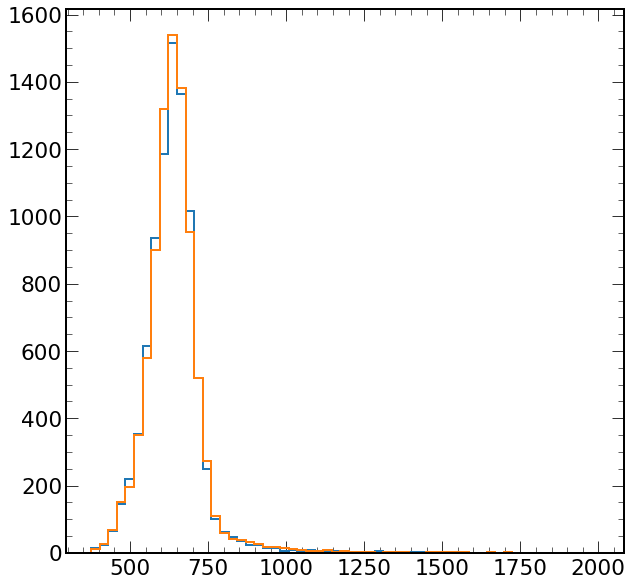

In [12]:
fig, ax = plt.subplots()
bins = np.linspace(375,2000,60)
Hist(old_tree.X_m[old_sr_mask], bins=bins, ax=ax)
Hist(new_tree.X_m[new_sr_mask], bins=bins, ax=ax)